In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [4]:
path = 'C:/Users/baoth/Desktop/Learnmore/DS/machine_learning_PS/data/mnist_train.csv'

In [6]:
mnist_data = pd.read_csv(path)

In [7]:
mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mnist_data.shape

(60000, 785)

In [10]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
features = mnist_data.drop('label',axis=1)

In [14]:
labels = mnist_data['label']

In [15]:
def display_image(index):
    print('Digit: ',labels[index])
    plt.imshow(features.loc[index].values.reshape(28,28),cmap='Greys')

Digit:  2


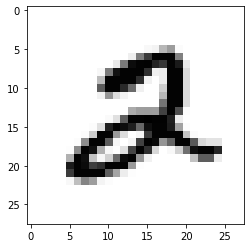

In [16]:
display_image(5)

In [17]:
kmeans_model = KMeans(n_clusters=10,max_iter=1000).fit(features)

In [18]:
kmeams_centroids = kmeans_model.cluster_centers_
kmeams_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
kmeams_centroids.shape

(10, 784)

In [20]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
test_data = mnist_data.sample(10,replace=False)
test_feature = test_data.drop('label',axis=1)
test_labels = test_data['label']

In [22]:
test_labels = np.array(test_labels)

In [23]:
preds_cluster = kmeans_model.predict(test_feature)

In [25]:
pred_results = pd.DataFrame({'actual_digit' : test_labels,
                            'pred_cluster': preds_cluster}) #poor predict

pred_results.head(10)

,actual_digit,pred_cluster
0,4,1
1,7,1
2,5,0
3,0,7
4,3,2
5,7,4
6,3,2
7,3,9
8,9,1
9,1,4


In [28]:
minibatch = MiniBatchKMeans(n_clusters=10,max_iter=10000,batch_size=100).fit(features)

In [29]:
preds_cluster = minibatch.predict(test_feature)
pred_results = pd.DataFrame({'actual_digit' : test_labels,
                            'pred_cluster': preds_cluster})

pred_results.head(10)

,actual_digit,pred_cluster
0,4,4
1,7,4
2,5,3
3,0,8
4,3,2
5,7,1
6,3,2
7,3,6
8,9,4
9,1,1
